<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Compare-different-optimizers" data-toc-modified-id="Compare-different-optimizers-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Compare different optimizers</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-nodes-in-subgraphs" data-toc-modified-id="Distribution-of-nodes-in-subgraphs-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Distribution of nodes in subgraphs</a></span></li><li><span><a href="#Distributions-of-treewidth-across-different-edges" data-toc-modified-id="Distributions-of-treewidth-across-different-edges-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Distributions of treewidth across different edges</a></span></li></ul></li><li><span><a href="#Map-treewidth-with-respect-to-QAOA-parameters" data-toc-modified-id="Map-treewidth-with-respect-to-QAOA-parameters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Map treewidth with respect to QAOA parameters</a></span><ul class="toc-item"><li><span><a href="#Map-the-tw-parameter" data-toc-modified-id="Map-the-tw-parameter-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Map the tw parameter</a></span></li><li><span><a href="#Map-the-nnodes-parameter" data-toc-modified-id="Map-the-nnodes-parameter-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Map the nnodes parameter</a></span></li></ul></li><li><span><a href="#Timing-statevector-simulation-with-respect-to-QAOA-params" data-toc-modified-id="Timing-statevector-simulation-with-respect-to-QAOA-params-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Timing statevector simulation with respect to QAOA params</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qtensor
from qtensor import QtreeQAOAComposer
from functools import lru_cache
from itertools import product

In [2]:
from cartesian_explorer import Explorer

In [3]:
%load_ext autoreload
%autoreload 2

## Compare different optimizers

In [14]:
ex = Explorer()

@ex.add_function(provides='tw', requires=('graph', 'p', 'ordering_algo', 'max_time'))
def qaoa_energy_tw(graph, p, ordering_algo, max_time):
    return qtensor.toolbox.qaoa_energy_tw_from_graph(graph, p, ordering_algo=ordering_algo, max_time=max_time)

@ex.add_function(provides='graph', requires=('n', 'd', 'graph_type'))
def get_graph(n, d, graph_type):
    G = qtensor.toolbox.random_graph(nodes=n, degree=d, type=graph_type)
    return G

@ex.provider
def subgraphs_nodes(graph, p):
    n_nodes = []
    for edge in graph.edges():
        subg = qtensor.utils.get_edge_subgraph(G=graph, edge=edge, dist=p)
        n_nodes.append(subg.number_of_nodes())
    return n_nodes

req ('graph', 'p')


### Distribution of nodes in subgraphs

/home/dali/side-projects-hobby/cartesian_explorer/cartesian_explorer/ExplorerBasic.py:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  result = np.array(list(tqdm(


/home/dali/side-projects-hobby/cartesian_explorer/cartesian_explorer/ExplorerBasic.py:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  result = np.array(list(tqdm(


/home/dali/side-projects-hobby/cartesian_explorer/cartesian_explorer/ExplorerBasic.py:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  result = np.array(list(tqdm(


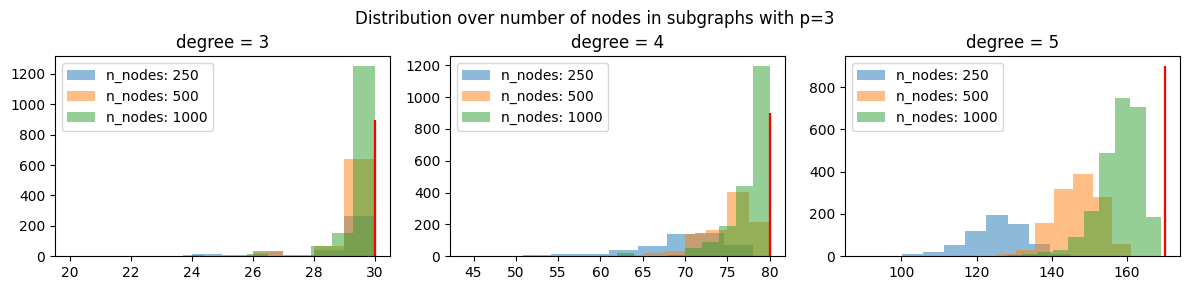

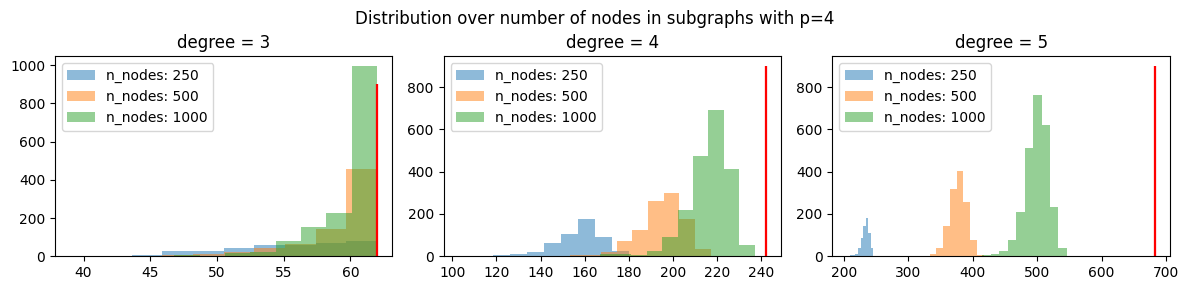

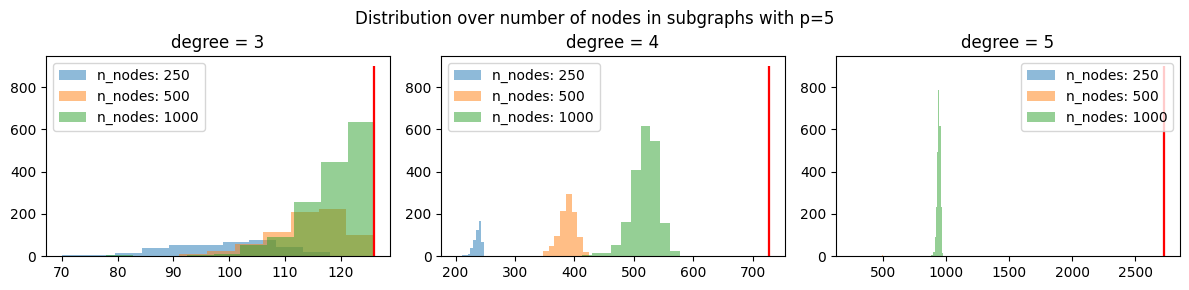

In [61]:
ns = [250, 500, 1000]
ds = [3,4,5]
p = 4
graph_type = 'random'
def bethe_nodes(d, p):
    return 2*np.sum((d-1)**np.arange(p+1))
    
for p in [3,4,5]:
    nodes_per_dn = ex.map_variable('subgraphs_nodes', d=ds, n=ns,
                                p=[p], graph_type=[graph_type])

    f, axs = plt.subplots(1, 3, dpi=100, figsize=(12,3))
    axs = (ax for ax in axs)
    for i, _nodes_per_n in enumerate(nodes_per_dn):
        plt.sca(next(axs))
        plt.title(f'degree = {ds[i]}')
        for j, _nodes in enumerate(_nodes_per_n):
            max_nodes = bethe_nodes(ds[i], p)
            plt.hist(_nodes,  alpha=.5, label=f'n_nodes: {ns[j]}')
            plt.vlines(max_nodes, ymin=0, ymax=900, color='red')
        plt.legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.suptitle(f'Distribution over number of nodes in subgraphs with p={p}')
    plt.savefig(f'../data/figures/subgraph_nodes_distrib/p{p}_{graph_type}.pdf')

### Distributions of treewidth across different edges

In [62]:
def plot_tw_hist(tws, **kwargs):
    vals, bins = np.histogram(tws)
    plt.plot(bins[1:], vals/np.size(tws), **kwargs)
    plt.fill_between(bins[1:], vals/np.size(tws), alpha=.3)
    plt.xlabel('tw')

In [65]:
G = qtensor.toolbox.random_graph(1000, degree=3)

/home/dali/side-projects-hobby/cartesian_explorer/cartesian_explorer/ExplorerBasic.py:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  result = np.array(list(tqdm(


In [67]:
tws.shape

(2, 2)

/home/dali/side-projects-hobby/cartesian_explorer/cartesian_explorer/ExplorerBasic.py:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  result = np.array(list(tqdm(


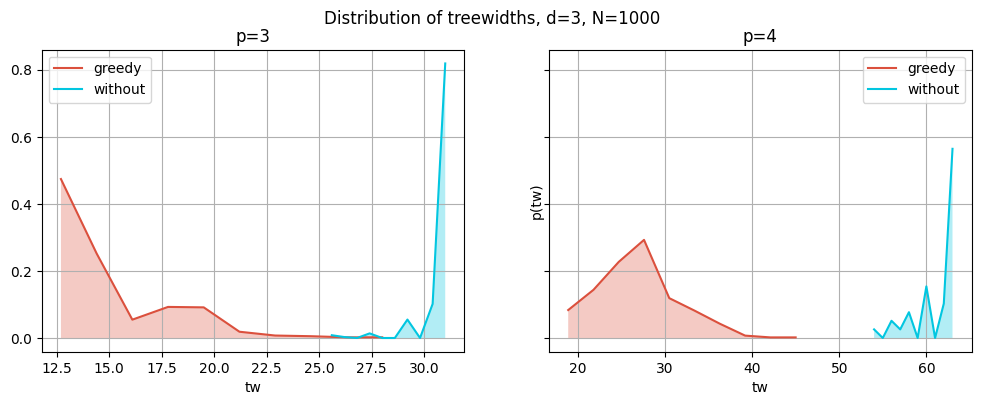

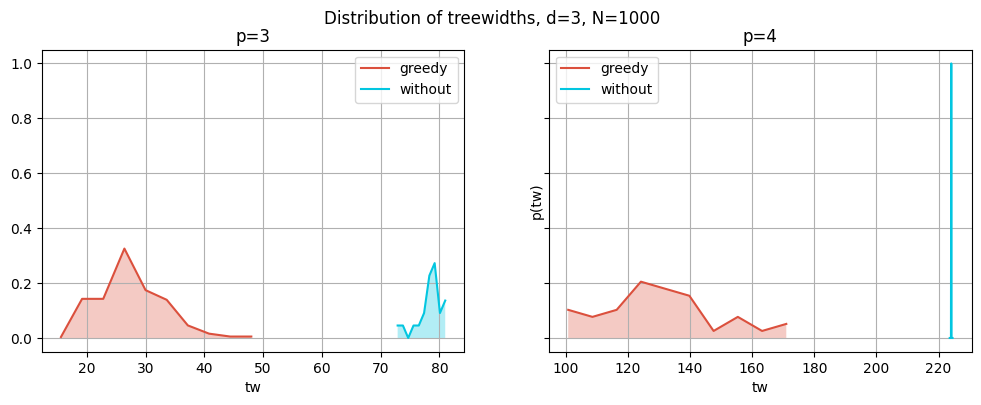

In [77]:
N = G.number_of_nodes()
ps = [3, 4]
ds = [3, 4]
graph_type = 'random'


tws_dp = ex.map_variable('tw',
                         d=ds,
                         n=[N],
                         p=ps,
                         ordering_algo=['greedy', 'without'],
                         graph_type=[graph_type],
                         max_time=[300]
                        )

for tws_p in tws_dp:
    f, axs = plt.subplots(1, len(ps), sharey=True, figsize=(12,4), dpi=100)
    axs = (a for a in axs)
    plt.ylabel('p(tw)')
    for tws, p in zip(tws_p, ps):
        plt.sca(next(axs))
        plt.gca().set_prop_cycle(color=['#db503d', '#02C6E0'])
        for a, algo in enumerate(['greedy', 'without']): 
            plot_tw_hist(tws[a], label=algo)
            
        plt.suptitle(f'Distribution of treewidths, d=3, N={N}')
        plt.title(f'p={p}' )
        plt.legend()
        plt.grid()
        try:
            plt.sca(next(axs_gen))
        except StopIteration:
            pass


## Map treewidth with respect to QAOA parameters

In [4]:
import time
from qtensor import CirqQAOAComposer
from qtensor import QAOASimulator, CirqSimulator
from qtensor import QAOACirqSimulator, QAOAQtreeSimulator
from qtensor.optimisation.Optimizer import WithoutOptimizer
from qtensor.optimisation.TensorNet import QtreeTensorNet


In [298]:

@ex.add_function(provides=('tws', 'mems', 'flops'), requires=('graph', 'p', 'ordering_algo', 'max_time'))
def qaoa_costs(graph, p, ordering_algo='without', max_time=300):
    
    costs_per_edge = qtensor.toolbox.qaoa_energy_cost_params_from_graph(
        graph, p=p, ordering_algo=ordering_algo, max_time=300
    )
    tws, mems, flops = zip(*costs_per_edge)
    return tws, mems, flops

In [299]:
@ex.add_function(provides=('graph_edges','graph_nodes'), requires='graph')
def graph_data(graph):
    return graph.number_of_edges(), graph.number_of_nodes()

@ex.add_function(provides='tw_graph', requires='tws')
def convert_tws(tws):
    return np.max(tws)

@ex.add_function(provides='mems_graph', requires='mems')
def convert_mems(mems):
    return np.max(mems)

@ex.add_function(provides='flops_graph', requires=('flops', 'graph_edges'))
def convert_flops(flops, graph_edges):
    part = len(flops)/graph_edges
    return np.sum(flops)/part


### Map the tw parameter

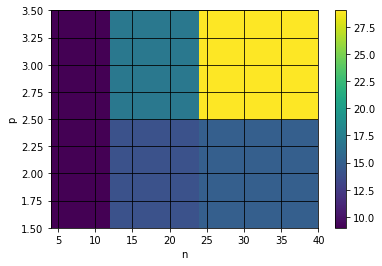

In [33]:
ns = np.power(2, np.arange(3, 6))
ps = [2,3,]

ex.plot_variables3d('tw_graph', plt_func=plt.pcolormesh, plot_kwargs=dict(shading='nearest'),
                    n=ns, p=ps,
                    d=3, graph_type='random', max_time=100, ordering_algo='without')
plt.grid(color='black')


In [300]:
@ex.add_function(provides='log_flops_graph', requires='flops_graph')
def log_flops(flops_graph):
    if flops_graph is None:
        return np.inf
    return np.log10(float(flops_graph))

@ex.add_function(provides='log_mems_graph', requires='mems_graph')
def log_mems(mems_graph):
    if mems_graph is None:
        return np.inf
    return np.log10(float(mems_graph))

@ex.add_function(provides='tw_correct', requires='tw_graph')
def tw_correct(tw_graph):
    if tw_graph is None:
        return np.inf
    return tw_graph

@ex.add_function(provides='feasible_flops', requires='flops_graph')
def feasible_flops(flops_graph):
    if flops_graph is None:
        return 3
    S = 200
    if flops_graph<S*3*1e9:
        return 0
    elif flops_graph<S*56*3*1e9:
        return 1
    elif flops_graph<S*50*4096*2*1e9:
        return 2
    else:
        return 3


Text(0.5, 1.0, 'Feasibility of QAOA degree-3 regular Energy')

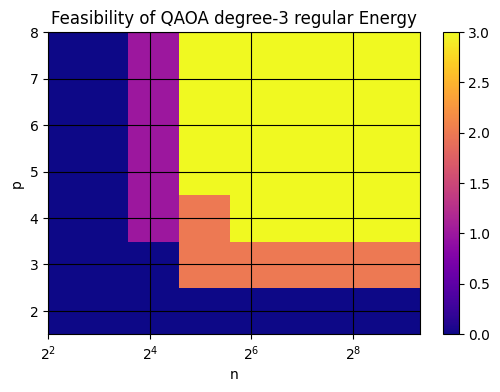

In [108]:
ns = np.power(2, np.arange(3, 10))
ps = [2,3,4,5,7]

f = plt.figure(dpi=100)
ex.plot_variables3d('feasible_flops',
                    plt_func=plt.pcolormesh, plot_kwargs=dict(
                        shading='nearest',
                        cmap='plasma'
                    ),
                    n=ns, p=ps,
                    d=3, graph_type='random', max_time=100, ordering_algo='without')
plt.grid(color='black')
plt.xscale('log', base=2)
plt.title('Feasibility of QAOA degree-3 regular Energy')


Text(0.5, 1.0, 'Feasibility of QAOA degree-3 regular Energy')

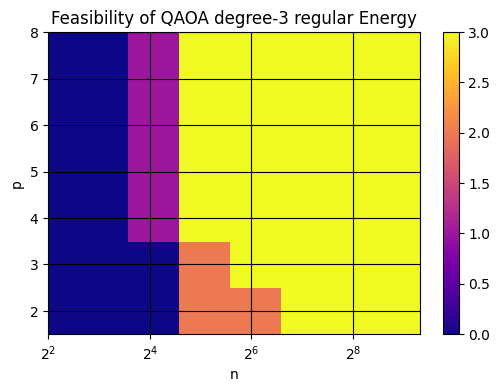

In [109]:
ns = np.power(2, np.arange(3, 10))
ps = [2,3,4,5,7]

f = plt.figure(dpi=100)
ex.plot_variables3d('feasible_flops',
                    plt_func=plt.pcolormesh, plot_kwargs=dict(
                        shading='nearest',
                        cmap='plasma'
                    ),
                    n=ns, p=ps,
                    d=3, graph_type='erdos_renyi', max_time=100, ordering_algo='without')
plt.grid(color='black')
plt.xscale('log', base=2)
plt.title('Feasibility of QAOA degree-3 regular Energy')


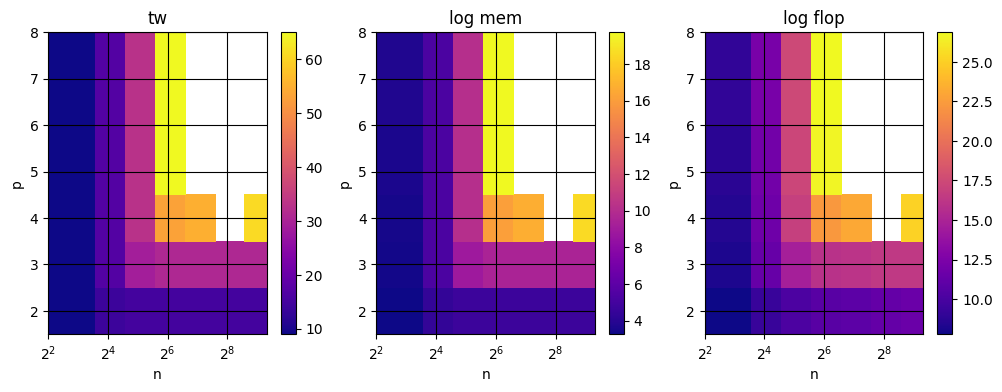

In [100]:
ns = np.power(2, np.arange(3, 10))
ps = [2,3,4,5,7]

f, axs = plt.subplots(1, 3, dpi=100, figsize=(12,4))
plt.sca(axs[0])
plt.title('tw')

ex.plot_variables3d('tw_correct',
                    plt_func=plt.pcolormesh, plot_kwargs=dict(
                        shading='nearest',
                        cmap='plasma'
                    ),
                    n=ns, p=ps,
                    d=3, graph_type='random', max_time=100, ordering_algo='without')
plt.grid(color='black')
plt.xscale('log', base=2)

plt.sca(axs[1])
plt.title('log mem')

ex.plot_variables3d('log_mems_graph',
                    plt_func=plt.pcolormesh, plot_kwargs=dict(
                        shading='nearest',
                        cmap='plasma'
                    ),
                    n=ns, p=ps,
                    d=3, graph_type='random', max_time=100, ordering_algo='without')

plt.grid(color='black')
plt.xscale('log', base=2)

plt.sca(axs[2])
plt.title('log flop')

ex.plot_variables3d('log_flops_graph',
                    plt_func=plt.pcolormesh, plot_kwargs=dict(
                        shading='nearest',
                        cmap='plasma'
                    ),
                    n=ns, p=ps,
                    d=3, graph_type='random', max_time=100, ordering_algo='without')

plt.grid(color='black')
plt.xscale('log', base=2)

In [86]:
flops = ex.map_variable('flops_graph', n=ns, p=ps,
                    d=[3], graph_type=['random'], max_time=[100], ordering_algo=['without'])

bundle = np.array([ns, ps, flops], dtype=object)
np.save('../data/qaoa_energy_flops_random_without.npy', bundle)

In [1]:
f = plt.figure(figsize=(6,5), dpi=100)
ax = plt.gca()
m = ax.pcolormesh(ns, ps, zz.T, levels=3, shading='nearest')

f.colorbar(m)
f.suptitle('Maximum treewidth of QAOA depth p energy circuits\n'
           'Random 3-regular graphs of size N, default order')
ax.set_ylabel('p')
ax.set_xlabel('N')
plt.xscale('log', base=2)

ax.grid(color='black')

NameError: name 'plt' is not defined

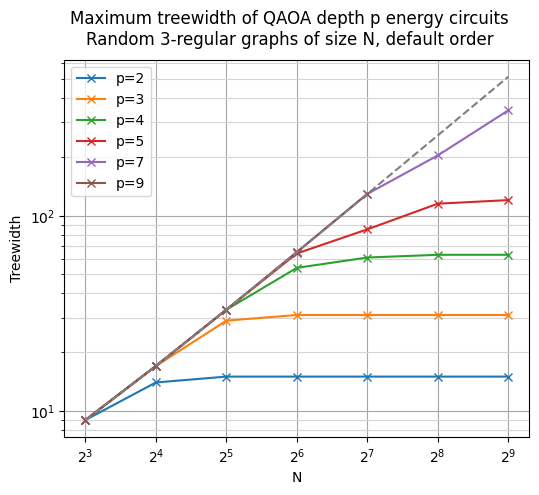

In [145]:
f = plt.figure(figsize=(6,5), dpi=100)
ax = plt.gca()
pgen = (x for x in ps)
for prow in zz.T:
    plt.plot(ns, prow, 'x-', label=f'p={next(pgen)}')
plt.plot(ns, ns+1, '--', color='gray')
plt.legend()

f.suptitle('Maximum treewidth of QAOA depth p energy circuits\n'
           'Random 3-regular graphs of size N, default order')
ax.set_ylabel('Treewidth')
ax.set_xlabel('N')
plt.yscale('log')
plt.xscale('log', base=2)
ax.grid(which='major', color='.65')
ax.grid(which='minor', ls='-', color='.83')

### Map the nnodes parameter

In [148]:
@lru_cache()
def qaoa_energy_num_line_nodes(n, p, d, ordering_algo='without', max_time=300):
    G = qtensor.toolbox.random_graph(nodes=n, degree=d)
    nodes = []
    start = time.time()
    for e in tqdm(G.edges()):
        comp = QtreeQAOAComposer(G, beta=[.1]*p, gamma=[.2]*p)
        comp.energy_expectation_lightcone(e)
        tn = QtreeTensorNet.from_qtree_gates(comp.circuit)
        n = tn.get_line_graph().number_of_nodes()
        nodes.append(n)
        if time.time() - start > max_time:
            break
    return nodes


In [150]:
ns = np.power(2, np.arange(3, 10))
ps = [2,3,4,5,7,9]

all_params = list(product(ns, ps))

tws = []
for n in ns:
    p_loop = False
    for p in ps:
        tws.append(qaoa_energy_num_line_nodes(n, p, d=3, ordering_algo='without'))
        p_loop = True

KeyboardInterrupt: 

In [151]:
xl, yl = len(ns), len(ps)

zz = np.zeros((xl, yl))

for i, treewidths in enumerate(tws):
    tt = np.unravel_index([i], (xl, yl))
    zz[tt] = np.max(treewidths)

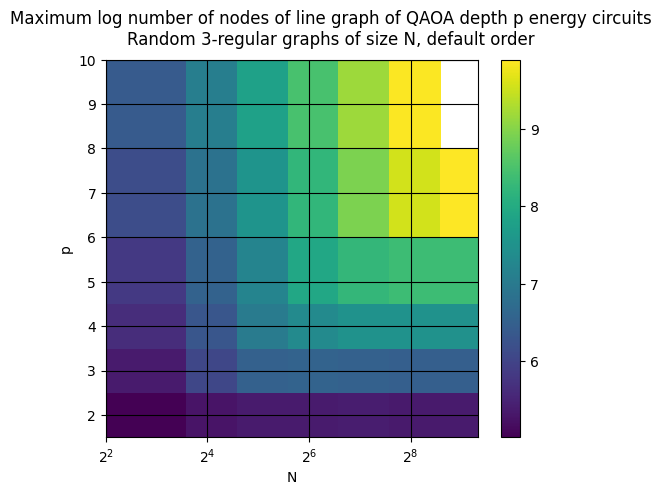

In [157]:
f = plt.figure(figsize=(6,5), dpi=100)
ax = plt.gca()
m = ax.pcolormesh(ns, ps, np.log(zz.T), shading='nearest')

f.colorbar(m)
f.suptitle('Maximum log number of nodes of line graph of QAOA depth p energy circuits\n'
           'Random 3-regular graphs of size N, default order')
ax.set_ylabel('p')
ax.set_xlabel('N')
plt.xscale('log', base=2)

ax.grid(color='black')

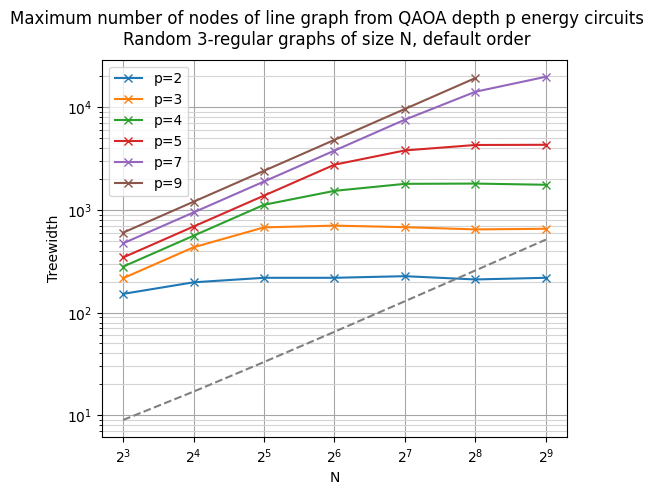

In [155]:
f = plt.figure(figsize=(6,5), dpi=100)
ax = plt.gca()
pgen = (x for x in ps)
for prow in zz.T:
    plt.plot(ns, prow, 'x-', label=f'p={next(pgen)}')
plt.plot(ns, ns+1, '--', color='gray')
plt.legend()

f.suptitle('Maximum number of nodes of line graph from QAOA depth p energy circuits\n'
           'Random 3-regular graphs of size N, default order')
ax.set_ylabel('Treewidth')
ax.set_xlabel('N')
plt.yscale('log')
plt.xscale('log', base=2)
ax.grid(which='major', color='.65')
ax.grid(which='minor', ls='-', color='.83')

In [5]:
import time
from qtensor import CirqQAOAComposer
from qtensor import QAOASimulator, CirqSimulator
from qtensor import QAOACirqSimulator, QAOAQtreeSimulator
from qtensor.optimisation.Optimizer import WithoutOptimizer
from qtensor.optimisation.TensorNet import QtreeTensorNet


## Timing statevector simulation with respect to QAOA params

In [6]:
def cirq_qaoa_simulation(N, p, d):
    G = qtensor.toolbox.random_graph(nodes=N, type='random', degree=d)
    sim = QAOACirqSimulator(CirqQAOAComposer)
    return sim.energy_expectation(G, gamma=[.1]*p, beta=[.23]*p)
    
@lru_cache()
def time_qaoa(N, p, d=3):
    start = time.time()
    result = cirq_qaoa_simulation(N, p, d)
    end = time.time()
    return end-start

In [7]:
import time
from qtensor import CirqQAOAComposer
from qtensor import QAOASimulator, CirqSimulator
from qtensor import QAOACirqSimulator, QAOAQtreeSimulator
from qtensor.optimisation.Optimizer import WithoutOptimizer
from qtensor.optimisation.TensorNet import QtreeTensorNet


In [6]:
ns = np.arange(10, 100, 10)
ps = [2,3,4,5,6,7,8,9]

all_params = list(product(ns, ps))

times = []
for n, p in all_params:
    if (n/10 + p) > 13 :
        times.append(None)
        print('skipping' ,n, p)
    else: 
        try:
            times.append(time_qaoa(N=n, p=p, d=3))
        except ValueError:
            print('Too large graph')
            times.append(None)
            

AttributeError: 'QAOACirqSimulator' object has no attribute 'optimizer'

In [6]:
sim = QAOACirqSimulator(CirqQAOAComposer)
cir = sim._edge_energy_circuit(G, [1]*3,[1]*3, (0,1))
tr = sim.simulate(cir)

NameError: name 'G' is not defined

In [16]:
xl, yl = len(ns), len(ps)

zz = np.zeros((xl, yl))

for i, time in enumerate(times):
    tt = np.unravel_index([i], (xl, yl))
    zz[tt] = time

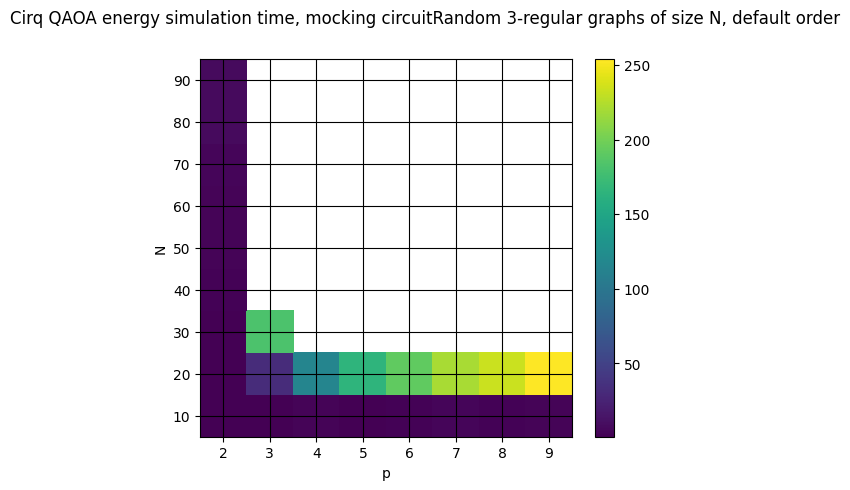

In [17]:
f = plt.figure(figsize=(6,5), dpi=100)
ax = plt.gca()
m = ax.pcolormesh(ps, ns, zz, shading='nearest')

f.colorbar(m)
f.suptitle('Cirq QAOA energy simulation time, mocking circuit\n'
           'Random 3-regular graphs of size N, default order')
ax.set_ylabel('N')
ax.set_xlabel('p')

ax.grid(color='black')

In [29]:
def qtree_qaoa_simulation(N, p, d):
    G = qtensor.toolbox.random_graph(nodes=N, type='random', degree=d)
    sim = QAOAQtreeSimulator(QtreeQAOAComposer, optimizer=WithoutOptimizer())
    return sim.energy_expectation(G, gamma=[.1]*p, beta=[.23]*p)
    
@lru_cache()
def time_qaoa_qtree(N, p, d=3):
    start = time.time()
    result = qtree_qaoa_simulation(N, p, d)
    end = time.time()
    return end-start

In [ ]:
ns = np.arange(10, 100, 10)
ps = [2,3,4,5,6,7,8,9]

all_params = list(product(ns, ps))

times_qtree = []
for n, p in all_params[5:]:
    if (n/10 + p) > 13 :
        times_qtree.append(None)
        print('skipping' ,n, p)
    else: 
        try:
            times_qtree.append(time_qaoa_qtree(N=n, p=p, d=3))
        except ValueError:
            print('Too large graph')
            times_qtree.append(None)
            

In [16]:
xl, yl = len(ns), len(ps)

zz_qtree = np.zeros((xl, yl))

for i, time in enumerate(times_qtree):
    tt = np.unravel_index([i], (xl, yl))
    zz[tt] = time

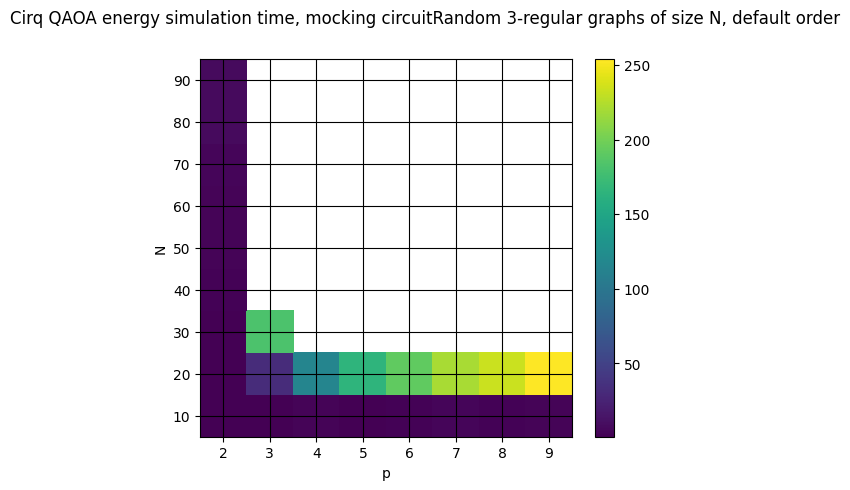

In [17]:
f = plt.figure(figsize=(6,5), dpi=100)
ax = plt.gca()
m = ax.pcolormesh(ps, ns, zz_qtree, shading='nearest')

f.colorbar(m)
f.suptitle('Cirq QAOA energy simulation time, mocking circuit\n'
           'Random 3-regular graphs of size N, default order')
ax.set_ylabel('N')
ax.set_xlabel('p')

ax.grid(color='black')

In [6]:
%load_ext autoreload
%autoreload 2

In [19]:
from tqdm.auto import tqdm 
import time
import networkx as nx


In [56]:
tqdm.tqdm._instances.clear()


In [309]:
graph = get_graph(2**6, 3, 'random')
composer = QtreeQAOAComposer(graph, beta=[.2]*3, gamma=[.1]*3)
composer.energy_expectation_lightcone(list(graph.edges())[0])
tn = qtensor.optimisation.TensorNet.QtreeTensorNet.from_qtree_gates(composer.circuit)
lg = tn.get_line_graph()


In [310]:
ex = Explorer()
@ex.add_function(provides='optimizer', requires='algo')
def get_opt(algo):
    return {'without':qtensor.optimisation.Optimizer.WithoutOptimizer()
            ,'greedy':qtensor.optimisation.Optimizer.DefaultOptimizer()
            ,'tamaki':qtensor.optimisation.Optimizer.TamakiOptimizer(wait_time=20)
           }[algo]

@ex.add_function(provides='peo', requires=('optimizer', 'tn'))
def get_peo(optimizer, tn):
    peo, _ = optimizer.optimize(tn)
    return tuple(peo)

@ex.add_function(provides='tw_path', requires=('peo', 'tn'))
def get_nghs(peo, tn):
    gr = tn.get_line_graph()
    ignore_vars = tn.bra_vars + tn.ket_vars + tn.free_vars
    peo = [int(x) for x in peo if x not in ignore_vars]
    n, nghs = qtensor.utils.get_neighbours_path(gr, peo=peo)
    return tuple(nghs)

@ex.add_function(provides=('mems', 'flops'), requires=('peo', 'tn'))
def get_cost(peo, tn):
    return tn.simulation_cost(peo)

@ex.add_function(provides=('mems_step', 'flops_step'), requires=('mems', 'flops', 'step'))
def get_cost_step(mems, flops, step):
    try:
        return mems[step], flops[step]
    except Exception:
        print(len(mems), step)
        raise

@ex.add_function(provides='tw_step', requires=('tw_path', 'step'))
def get_nghs_step(tw_path, step):
    return tw_path[step]




In [311]:
@ex.add_function(provides='tn', requires=('graph', 'p'))
def get_tn(graph, p):
    composer = QtreeQAOAComposer(graph, beta=[.2]*p, gamma=[.1]*p)
    edge = list(graph.edges())[0]
    composer.energy_expectation_lightcone(edge)
    tn = qtensor.optimisation.TensorNet.QtreeTensorNet.from_qtree_gates(composer.circuit)
    return tn

In [312]:
ex._variable_providers['tn'](graph, 3)

In [33]:
 
graph = get_graph(2**7, 3, 'random')
p = 3
tn = get_tn(graph, p)
    
subg = qtensor.utils.get_edge_subgraph(graph, list(graph.edges())[0], p)
print('subgraph nodes', subg.number_of_nodes())

lg = tn.get_line_graph()
print('lg nodes', lg.number_of_nodes())

edge (41, 104)
return tn <qtensor.optimisation.TensorNet.QtreeTensorNet object at 0x7f59aa3bf400>
subgraph nodes 28
lg nodes 612


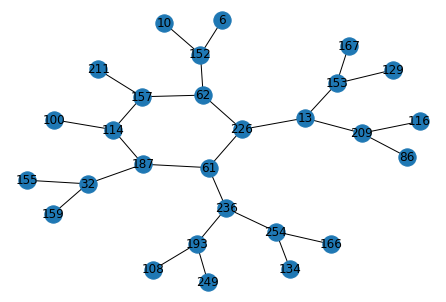

In [20]:
nx.draw_kamada_kawai(subg, with_labels=True)

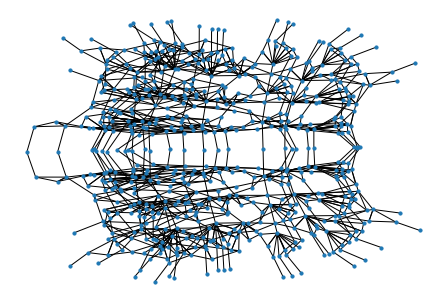

In [38]:
nx.draw_kamada_kawai(lg, node_size=10)

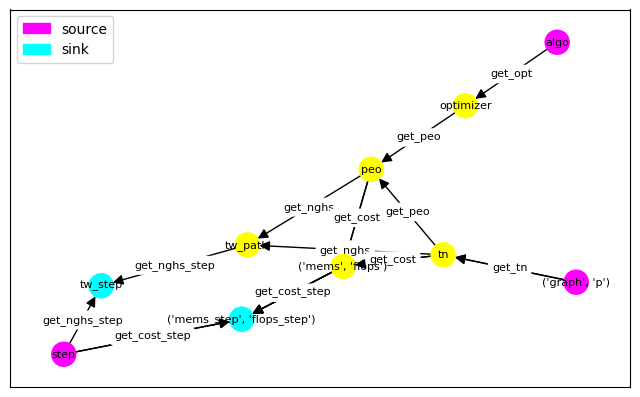

In [317]:
fig = ex.draw_dependency_graph()

In [315]:
list(depg.predecessors('tn'))
list(depg.successors('tn'))

['peo', 'tw_path', ('mems', 'flops')]

resolving ('mems_step',) have ('algo', 'step', 'graph', 'p')
resolving ('step', 'mems', 'flops') have ('step', 'p', 'graph', 'algo')
resolving ('tn', 'peo') have ('step', 'p', 'graph', 'algo')
resolving ('optimizer', 'tn', 'p', 'graph') have ('step', 'p', 'graph', 'algo')
resolving ('p', 'graph', 'algo') have ('step', 'p', 'graph', 'algo')
resolving ('flops_step',) have ('algo', 'step', 'graph', 'p')
resolving ('tw_step',) have ('algo', 'step', 'graph', 'p')
resolving ('step', 'tw_path') have ('step', 'p', 'graph', 'algo')
resolving ('tn', 'peo') have ('step', 'p', 'graph', 'algo')
resolving ('optimizer', 'tn', 'p', 'graph') have ('step', 'p', 'graph', 'algo')
resolving ('p', 'graph', 'algo') have ('step', 'p', 'graph', 'algo')



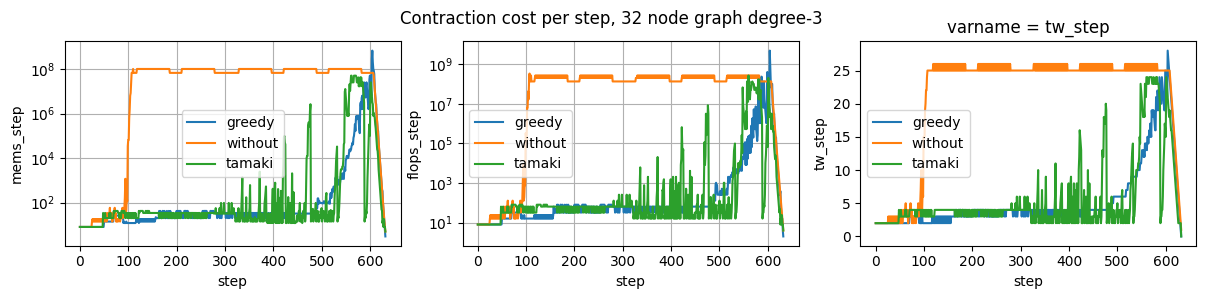

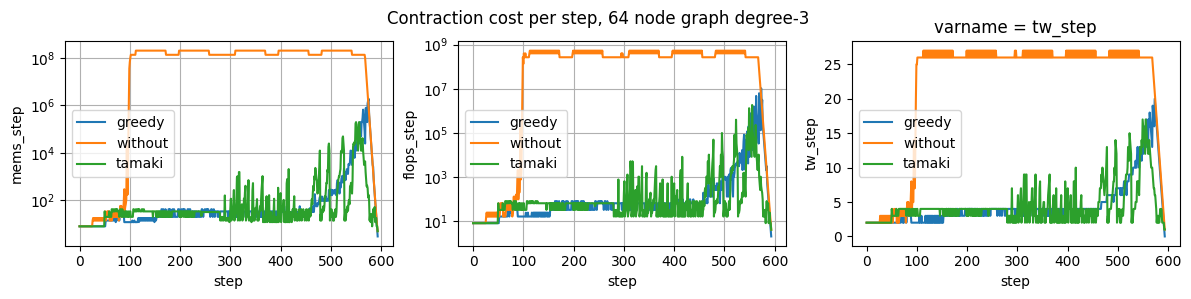

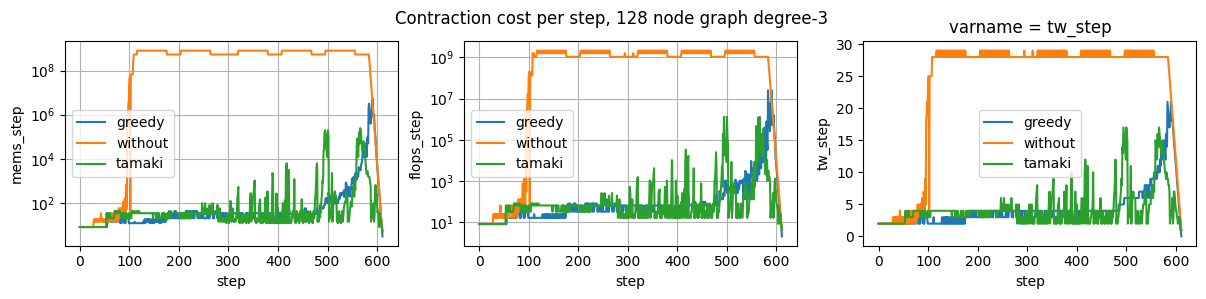

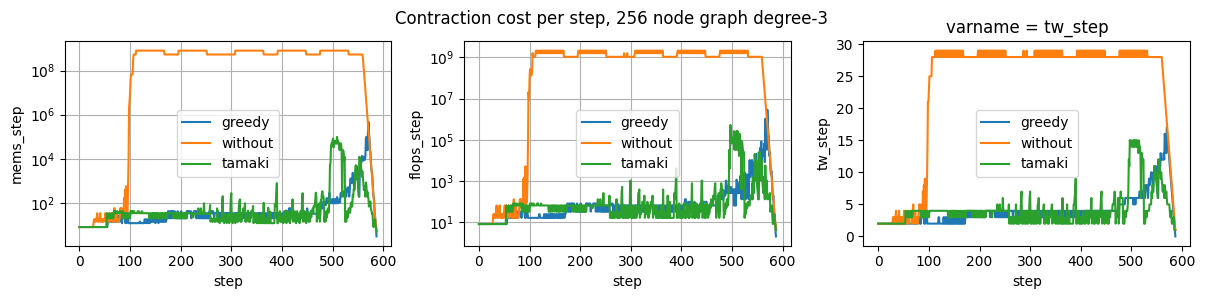

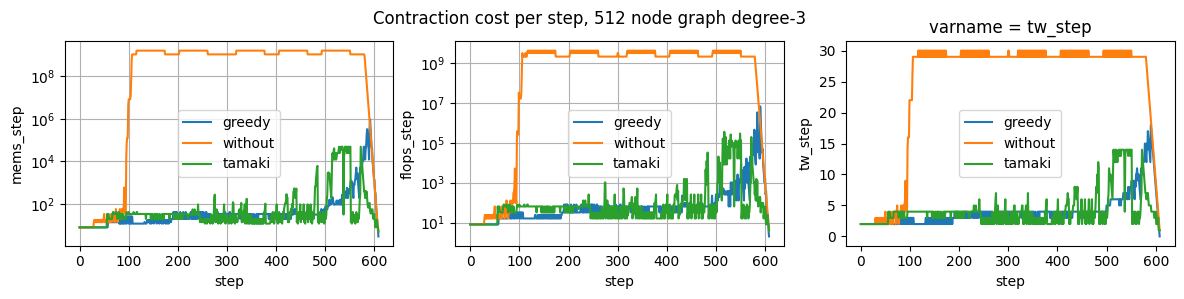

In [79]:
for n in range(5,10):
    graph = get_graph(2**n, 3, 'random')
    p = 3
    tn = get_tn(graph, p)
    subg = qtensor.utils.get_edge_subgraph(graph, list(graph.edges())[0], p)
    #print('subgraph nodes', subg.number_of_nodes())
    lg = tn.get_line_graph()
    #print('lg nodes', lg.number_of_nodes())
    fig = ex.plot_variables2d(('mems_step','flops_step','tw_step'),
                        algo=['greedy', 'without', 'tamaki'],
                        step=np.arange(lg.number_of_nodes()),
                        graph=[graph],
                        p = [p]
                       )
    for ax in fig.get_axes()[:2]:
        ax.set_yscale('log')
        ax.set_title('')
        ax.grid()

    plt.suptitle(f'Contraction cost per step, {graph.number_of_nodes()} node graph degree-3')
    plt.show()

n_nodes 23
n_nodes 29
n_nodes 28
n_nodes 30
n_nodes 30


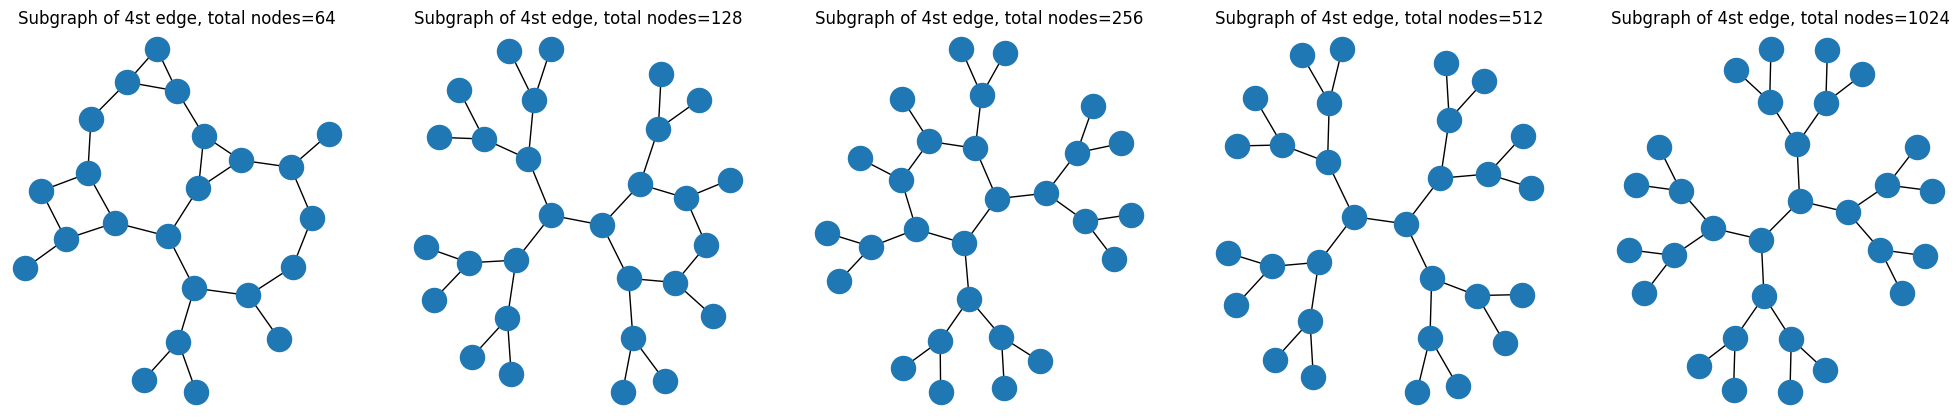

In [182]:
p = 3
graphs = [get_graph(x, p, 'random') for x in [64, 128, 256, 512, 1024]]
edge_idx = 3

subgraphs = [qtensor.utils.get_edge_subgraph(g, list(g.edges())[edge_idx], p) for g in graphs]

L = len(subgraphs)
f, axs = plt.subplots(1, L, figsize=(L*5, 5), dpi=100)
for ax, subg, g in zip(axs, subgraphs, graphs):
    plt.sca(ax)
    print('n_nodes', subg.number_of_nodes())
    nx.draw_kamada_kawai(subg, )
    plt.title(f'Subgraph of {edge_idx+1}st edge, total nodes={g.number_of_nodes()}')


In [37]:

costs_per_edge = qtensor.toolbox.qaoa_energy_cost_params_from_graph(
    graph, p=6, ordering_algo='greedy', max_time=300
)

tw 175


KeyboardInterrupt: 

In [21]:
list(map(lambda x: len(x[1]), graph.adjacency()))


[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [33]:
import networkx as nx

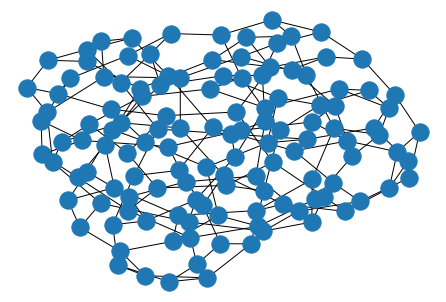

In [139]:
nx.draw_kamada_kawai(graph)

In [212]:
import gc

In [213]:
gc.collect()

133718

In [ ]:
qaoa_costs()